Base path /home/pooja/Desktop/Research/curraun/notebooks/Plots_Data_30042025_N_alpha_mnoise/ exists.
Go ahead and start plotting.:) :) 


N_list: [512]
alpha_list: [0.1, 0.001]
mnoise_list: [0.1, 0.5, 1.0]


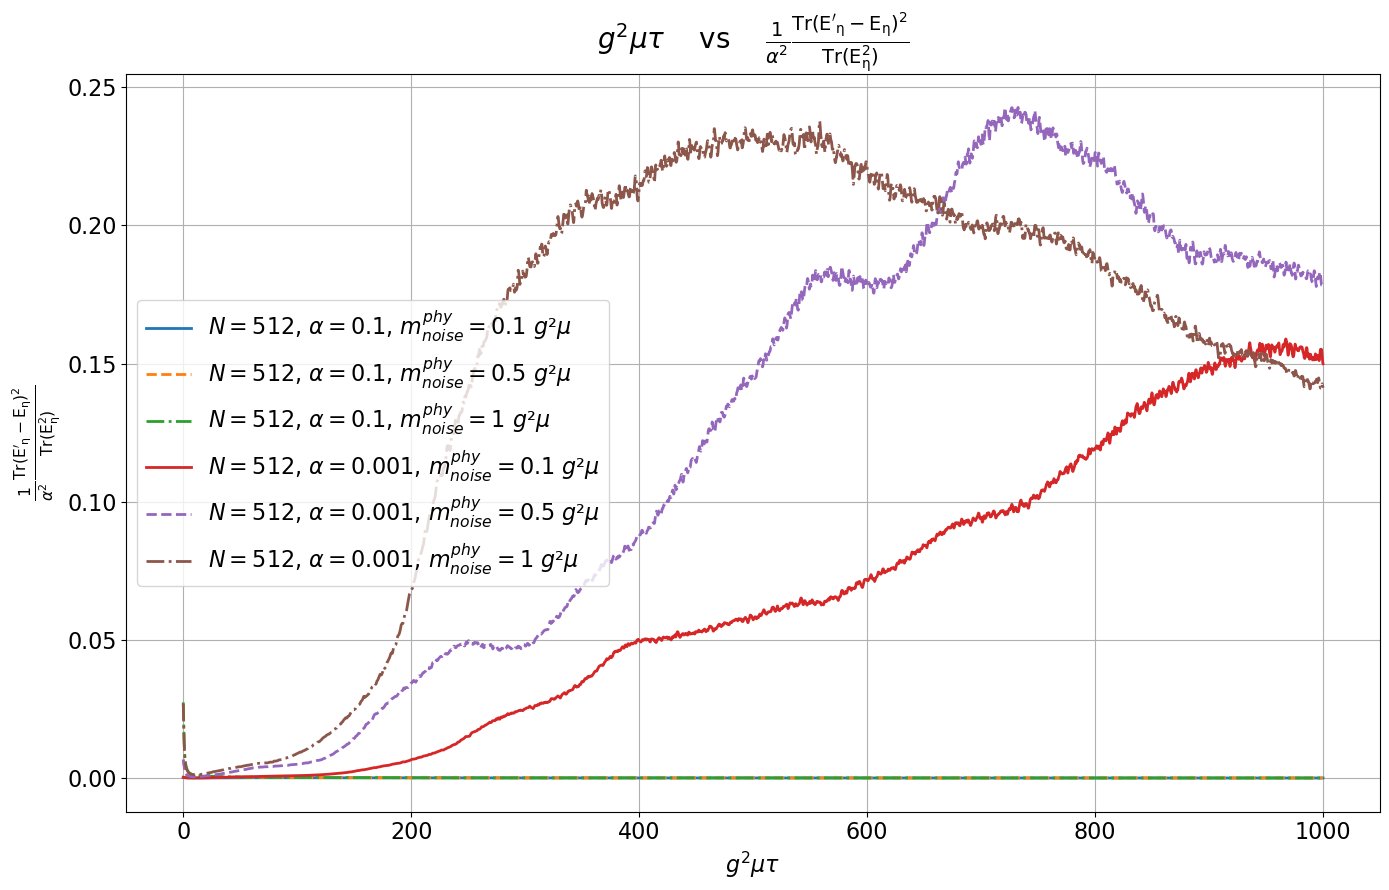

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


""""
from matplotlib import rc
# rc('text', usetex=True)
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams.update({'font.size':18})
"""


# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ #
# Base directory
base_path = "/home/pooja/Desktop/Research/curraun/notebooks/Plots_Data_30042025_N_alpha_mnoise/"

# Check if the base path exists
if not os.path.exists(base_path):
    raise FileNotFoundError(f"The directory {base_path} does not exist. Please check the path.")
else:
    print(f"Base path {base_path} exists.\nGo ahead and start plotting.:) :) \n\n")
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ #


# ======================================================================================================================= #
# Parameter lists

# N_list = [32, 64, 128, 256, 512, 1024]
N_list = [2**i for i in range(5, 11)]                                                           # Output: [32, 64, 128, 256, 512, 1024]

alpha_list = [10**(-i) for i in range(1, 7)]                                                    # Output: [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06]

mnoise_list = [round(x, 1) for x in np.arange(0.0, 1.01, 0.1)]                                  # It generates a list of values from 0.0 to 1.0 (both inclusive), increasing in steps of 0.1
                                                                                                # round(x, 1) ensures each value is rounded to 1 decimal place.
                                                                                                # Output: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

#  If you want to plot only for single N, alpha and/or mnoise, uncomment the following lines: 

N_list = [512]                                                                                   
alpha_list = [0.1, 0.001]                                                                           
mnoise_list = [0.1, 0.5, 1.0]       
linestyles = ['-', '--', '-.']                                                              # List of line styles for the plot
                                                                                                                                                                
print("N_list:", N_list)
print("alpha_list:", alpha_list)
print("mnoise_list:", mnoise_list)
# ======================================================================================================================= #

# Plot setup
plt.figure(figsize=(14, 9))



# Loop through all combinations
for N in N_list:
    for alpha in alpha_list:
        for mnoise_index, mnoise in enumerate(mnoise_list):


            # Format float to avoid issues like 0.1 becoming 0.10000000000001
            alpha_str = f"{alpha:.6f}".rstrip('0').rstrip('.')                                  # Cleaner display of alpha
                                                                                                # Formats alpha as a string with 6 decimal places. 
                                                                                                # Removes trailing zeros and (decimal if exists) from the right side of the string.
                                                                                                # print("alpha    :",  alpha, alpha_str, f"{alpha:.5f}")
                                                                                    
            mnoise_str = f"{mnoise:.1f}".rstrip('0').rstrip('.')

            

            # Construct filename
            filename = f"data_tau_diffEetabyalpha2_N{N}_alpha{alpha_str}_m{mnoise_str}.csv"
            file_path = os.path.join(base_path, filename)

            if not os.path.exists(file_path):
                continue  # skip if file doesn't exist

            try:
                df = pd.read_csv(file_path)
            except Exception as e:
                print(f"Error reading {filename}: {e}")
                continue

            label = rf"$N = {N}$, $\alpha = {alpha_str}$, $m_{{noise}}^{{phy}} = {mnoise_str}~ g²\mu$"
            plt.plot(df["tau"], df["diff_Eeta"], label=label, linewidth=2, linestyle=linestyles[mnoise_index])  # Plotting the data


# Set x and y limits
#plt.xlim(0.0, 1000)                                                                                        # To change the x scale
#plt.ylim(0.0, 1.1)                                                                                        # To change the y scale

# Set x and y ticks     
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Final plot formatting
plt.xlabel(r"$g^2 \mu \tau$", fontsize=16)
plt.ylabel(r"$  \frac{1}{\alpha^2} \mathrm {\frac{Tr(E'_{\eta} - E_{\eta})^2}{Tr(E_{\eta}^2)} }$", fontsize=16)
plt.title(r"$g^2 \mu \tau$    vs    $ \frac{1}{\alpha^2} \mathrm {\frac{Tr(E'_{\eta} - E_{\eta})^2}{Tr(E_{\eta}^2)} }$", fontsize=20)            # Plot title


plt.legend(fontsize=16, loc='best', ncol=1)  # Adjust layout if crowded
plt.grid(True)
plt.tight_layout()
plt.show()


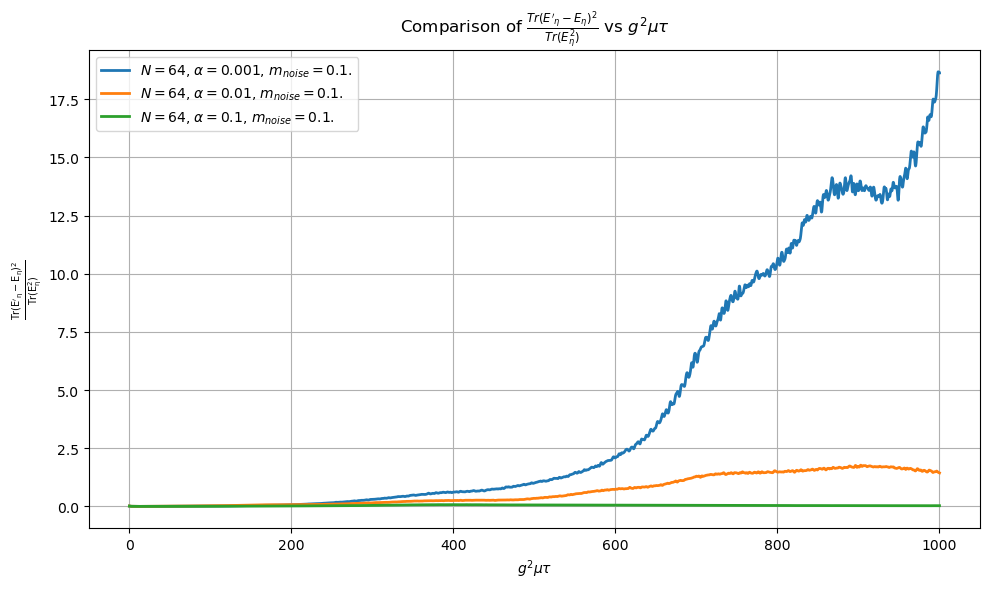

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re

# Base directory where your CSV files are located
base_path = "/home/pooja/Desktop/Research/curraun/notebooks/Plots_Data_30042025_N_alpha_mnoise/"

# List of all relevant CSV filenames (could also use os.listdir with filtering)
filenames = [
    "data_tau_diffEetabyalpha2_N64_alpha0.1_m0.1.csv",
    "data_tau_diffEetabyalpha2_N64_alpha0.01_m0.1.csv",
    "data_tau_diffEetabyalpha2_N64_alpha0.001_m0.1.csv"
]

# Optional: sort filenames if needed (e.g., by alpha)
filenames = sorted(filenames)

# Start plotting
plt.figure(figsize=(10, 6))

for filename in filenames:
    # Extract parameters using regular expressions
    match = re.search(r'N(\d+)_alpha([\d.]+)_m([\d.]+)', filename)
    if match:
        N = match.group(1)
        alpha = match.group(2)
        mnoise = match.group(3)

        # Read the CSV
        file_path = os.path.join(base_path, filename)
        df = pd.read_csv(file_path)

        # Plot
        label = rf"$N = {N}$, $\alpha = {alpha}$, $m_{{noise}} = {mnoise}$"
        plt.plot(df["tau"], df["diff_Eeta"], label=label, linewidth=2.0)

# Final plot settings
plt.xlabel(r"$g^2 \mu \tau$")
plt.ylabel(r"$\mathrm {\frac{Tr(E'_{\eta} - E_{\eta})^2}{Tr(E_{\eta}^2)} }$")
plt.title(r"Comparison of $\frac{Tr(E'_{\eta} - E_{\eta})^2}{Tr(E_{\eta}^2)}$ vs $g^2 \mu \tau$")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


Skipped file (no match): data_tau_diffEeta_N512_alpha1e-05_m0.1.csv
Skipped file (no match): data_tau_diffEeta_N512_alpha1e-06_m0.1.csv
Skipped file (no match): data_tau_diffEetabyalpha2_N512_alpha1e-05_m0.1.csv
Skipped file (no match): data_tau_diffEetabyalpha2_N512_alpha1e-06_m0.1.csv


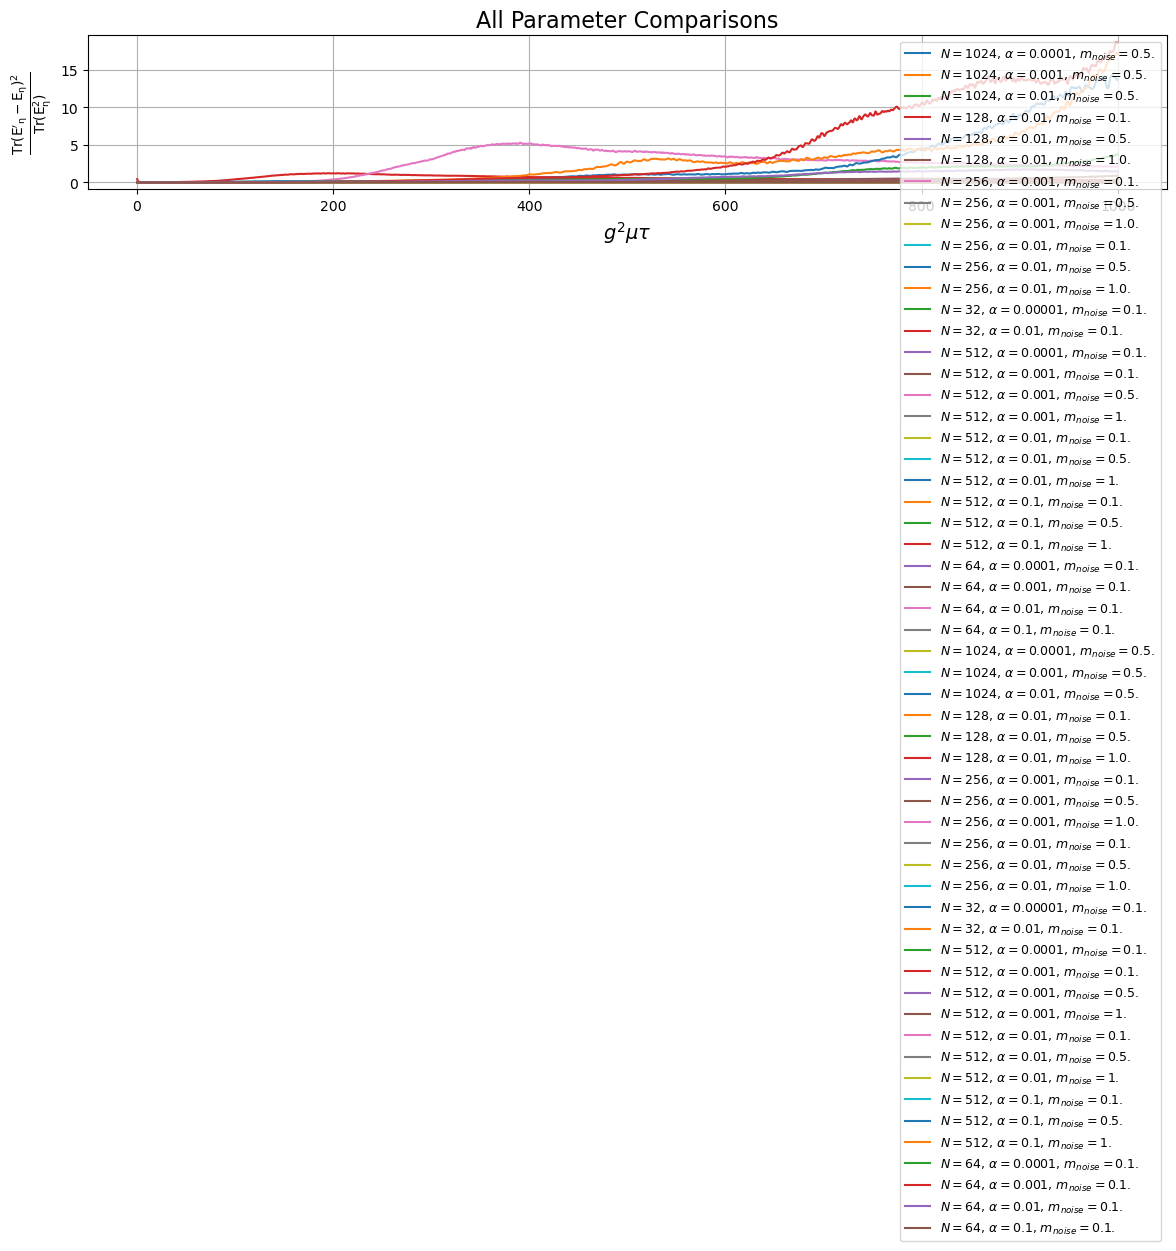

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re

# Set your base directory
base_path = "/home/pooja/Desktop/Research/curraun/notebooks/Plots_Data_30042025_N_alpha_mnoise/"

# Scan for all CSV files in the directory
all_files = [f for f in os.listdir(base_path) if f.endswith(".csv") and "data_tau_diffEeta" in f]

# Optional: sort for consistent plotting
all_files.sort()

# Initialize plot
plt.figure(figsize=(12, 8))

# Loop through each file
for filename in all_files:
    # Extract parameters from the filename using regex
    match = re.search(r'N(\d+)_alpha([\d.]+)_m([\d.]+)', filename)
    if not match:
        print(f"Skipped file (no match): {filename}")
        continue  # Skip files that don't match the pattern

    N = match.group(1)
    alpha = match.group(2)
    mnoise = match.group(3)

    # Read the CSV
    file_path = os.path.join(base_path, filename)
    try:
        df = pd.read_csv(file_path)
    except Exception as e:
        print(f"Failed to read {filename}: {e}")
        continue

    # Plot
    label = rf"$N = {N}$, $\alpha = {alpha}$, $m_{{noise}} = {mnoise}$"
    plt.plot(df["tau"], df["diff_Eeta"], label=label, linewidth=1.5)

# Final plot formatting
plt.xlabel(r"$g^2 \mu \tau$", fontsize=14)
plt.ylabel(r"$\mathrm {\frac{Tr(E'_{\eta} - E_{\eta})^2}{Tr(E_{\eta}^2)} }$", fontsize=14)
plt.title("All Parameter Comparisons", fontsize=16)
plt.legend(fontsize=9, loc='upper right')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
